#Exploratory Data Analysis

##Step 1: Prepare

In [1]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

##Data Loading

In [3]:
df=pd.read_csv('/content/sample_sales_data.csv')

In [4]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [6]:
df.tail()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash
7828,afd70b4f-ee21-402d-8d8f-0d9e13c2bea6,2022-03-06 13:50:36,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,non-member,14.99,4,59.96,debit card


##Step 2: Exploration

##Descriptive Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


The `.info()` method creates a data description of the dataframe. It tells us:

- How many rows (7829)
- How many columns (9)
- Column names
- How many values are non-null for each column
- The types of data contained within each column
- The size of the dataset loaded into memory (~550KB)

Looking at the output of the `.info()` method, we can intepret each column as follows:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

It is also interesting to look at the datatypes. We can see that there are 3 different datatypes within this dataset:

- object = this column contains categorical values
- float64 = this column contains floating point numerical values (i.e. decimal numbers)
- int64 = this column contains integer values (whole numbers)

Now let's compute some descriptive statistics of the numeric columns:

In [8]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


The `.describe()` method computes some descriptive statistics of the numerical columns, including:

- count = count of how many unique values exist
- mean = mean average value of this column
- std = standard deviation
- min = minimum value
- 25% = lower quartile value
- 50% = median value
- 75% = upper quartile value
- max = maximum value


##Visualisation

In [9]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import seaborn as sns

To analyse the dataset, below are the snippets of code that we can use as a helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns

In [11]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 10):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 10, aspect: int = 4):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

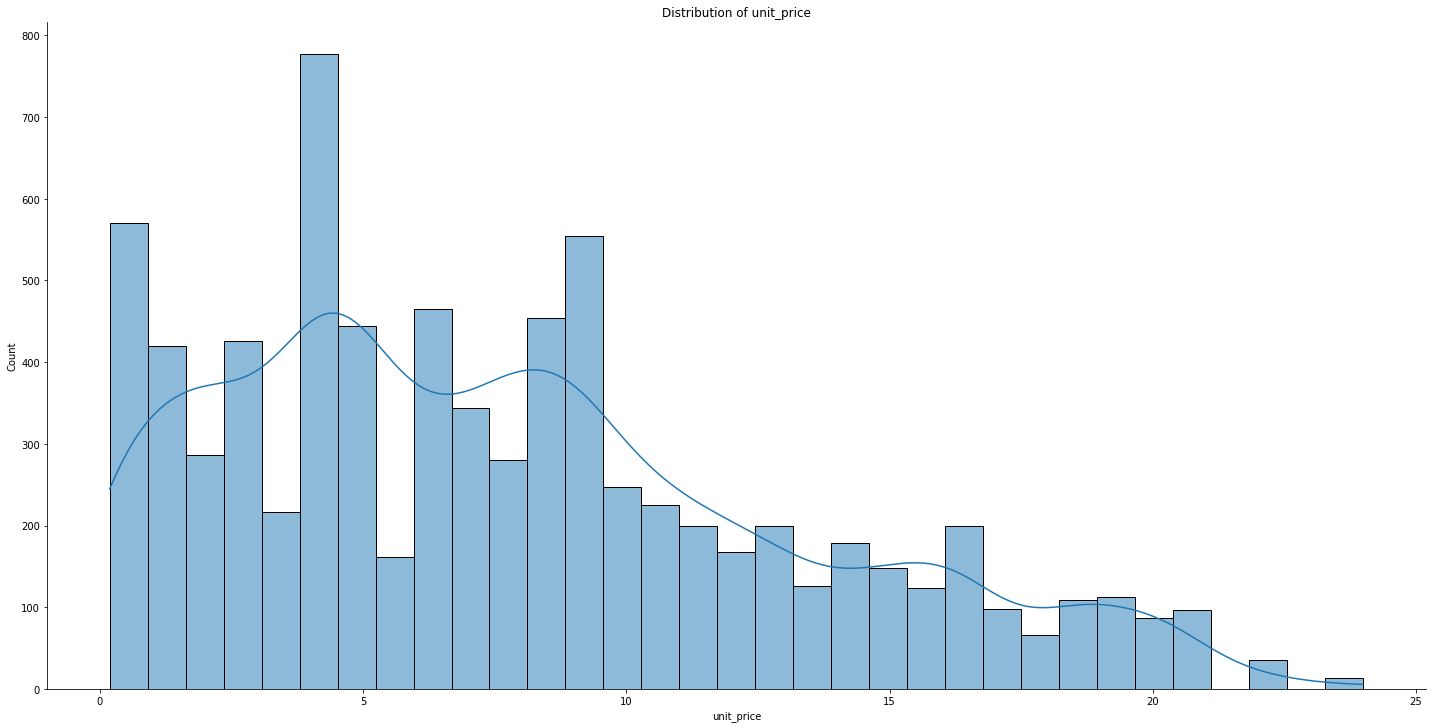

In [12]:
plot_continuous_distribution(df, 'unit_price')

Here, the distribution of `unit_price` is positively skewed, i.e, there are more sales of products with a low unit_price compared to products with a high unit_price.

So, you would expect a grocery store to sell more products that are cheap, and just a few products that are really expensive.

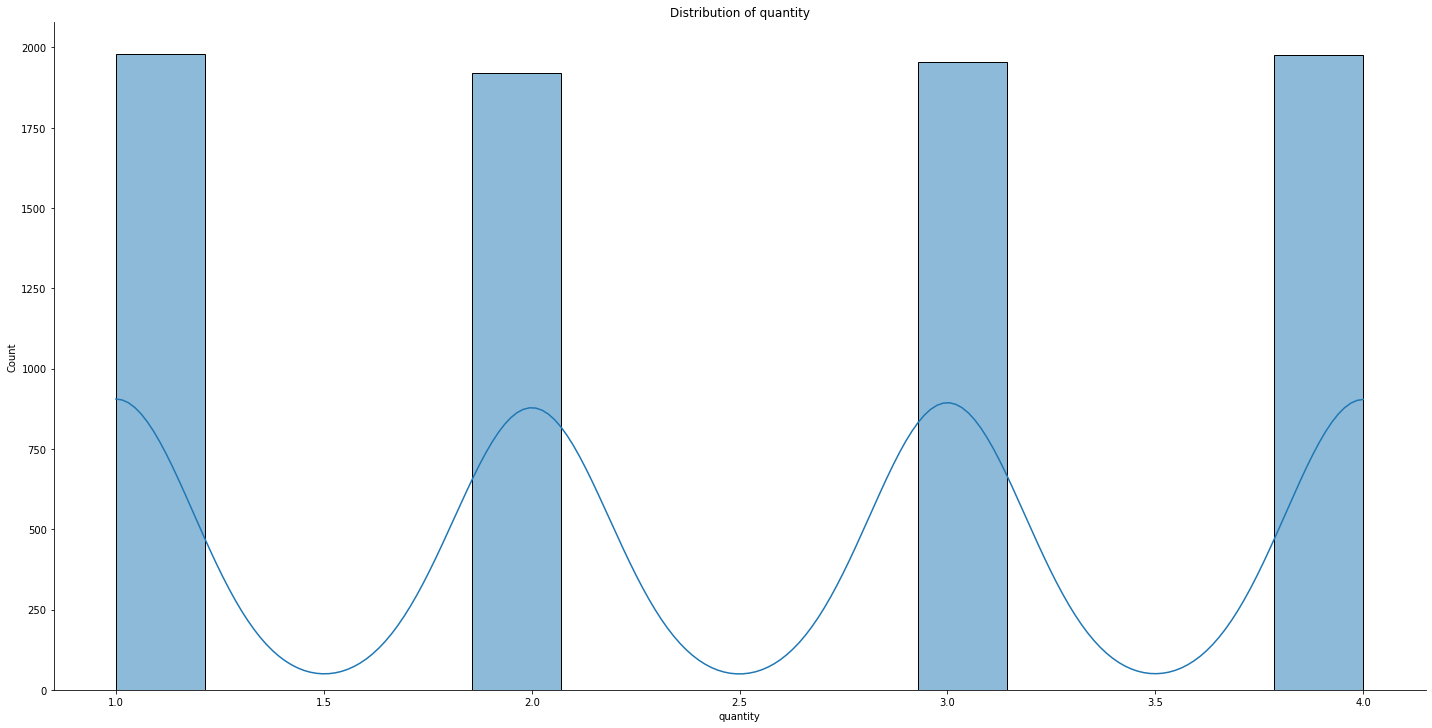

In [13]:
plot_continuous_distribution(df, 'quantity')

Here, the distribution of `quantity` is very different. We can see that only 4 unique values exist (1, 2, 3, and 4) and they are quite evenly distributed. Customers are buying in even quantities across 1 to 4 units.

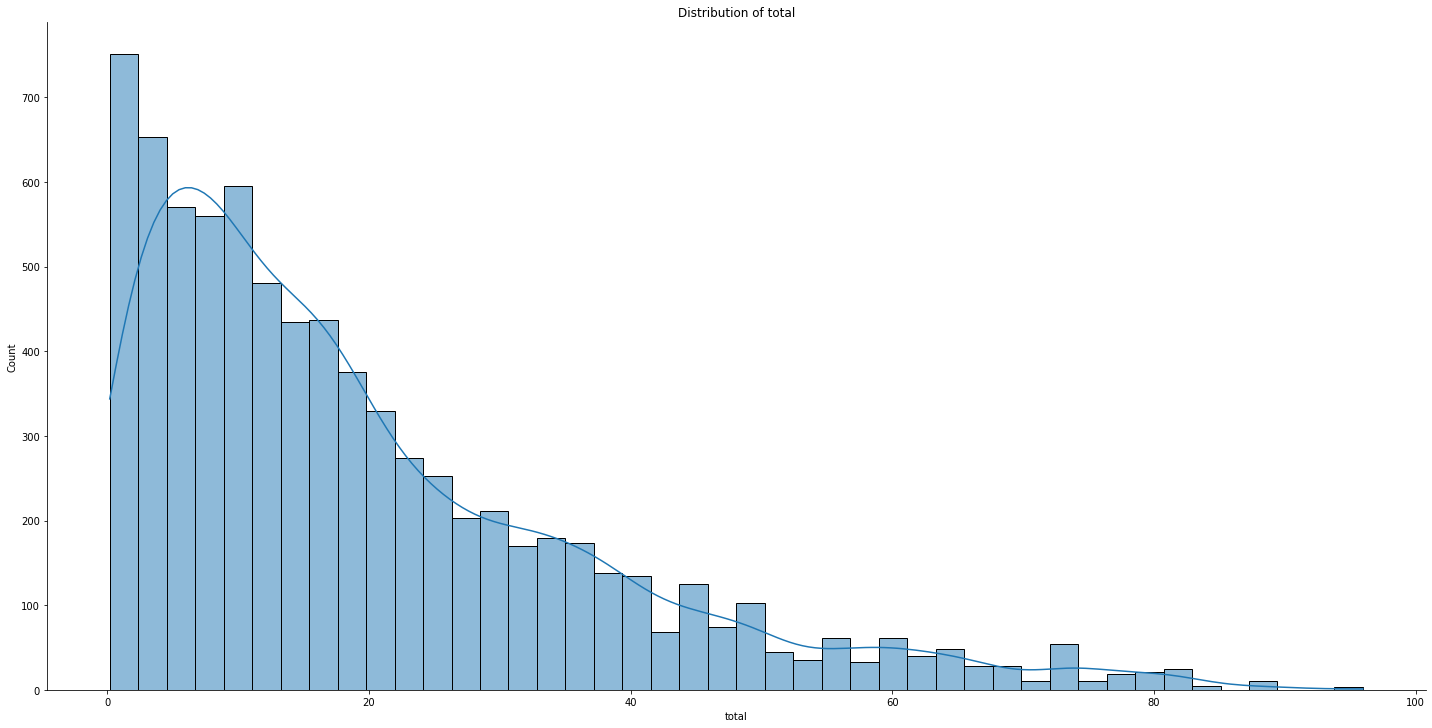

In [14]:
plot_continuous_distribution(df, 'total')

The `total` follows a similar distribution to `unit_price`. This you may expect, as the total is calculated as `unit_price x quantity`.

However, this distribution is even more positively skewed. You'd expect customers at a grocery store to generally make more transactions of low value and only occasionally make a transaction of a very high value.

Now let's turn our attention to the categorical columns within the dataset. 

Before visualising these columns, it is worth us understanding how many unique values these columns have. If a categorical column has 1000's of unique values, it will be very difficult to visualise.


In [15]:
get_unique_values(df, 'transaction_id')

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64


As explained previously, `transaction_id` is a unique ID column for each transaction. Since each row represents a unique transaction, this means that we have 7829 unique transaction IDs. Therefore, this column is not useful to visualise.

In [16]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


Similarly, `product_id` is an unique id column based on the product that was sold within the transaction. Here we have 300 unique product IDs, hence 300 unique products within the dataset. This is not worth visualising, but it certainly interesting to know. From the output of the helper function, we can see that the product most frequently was sold within this dataset was `ecac012c-1dec-41d4-9ebd-56fb7166f6d9`, sold 114 times during the week. Whereas the product least sold was `ec0bb9b5-45e3-4de8-963d-e92aa91a201e` sold just 3 times


In [17]:
get_unique_values(df, 'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


There are 22 unique values for `category`, with `fruit` and `vegetables` being the 2 most frequently purchased product categories and `spices and herbs` being the least. Let's visualise this too

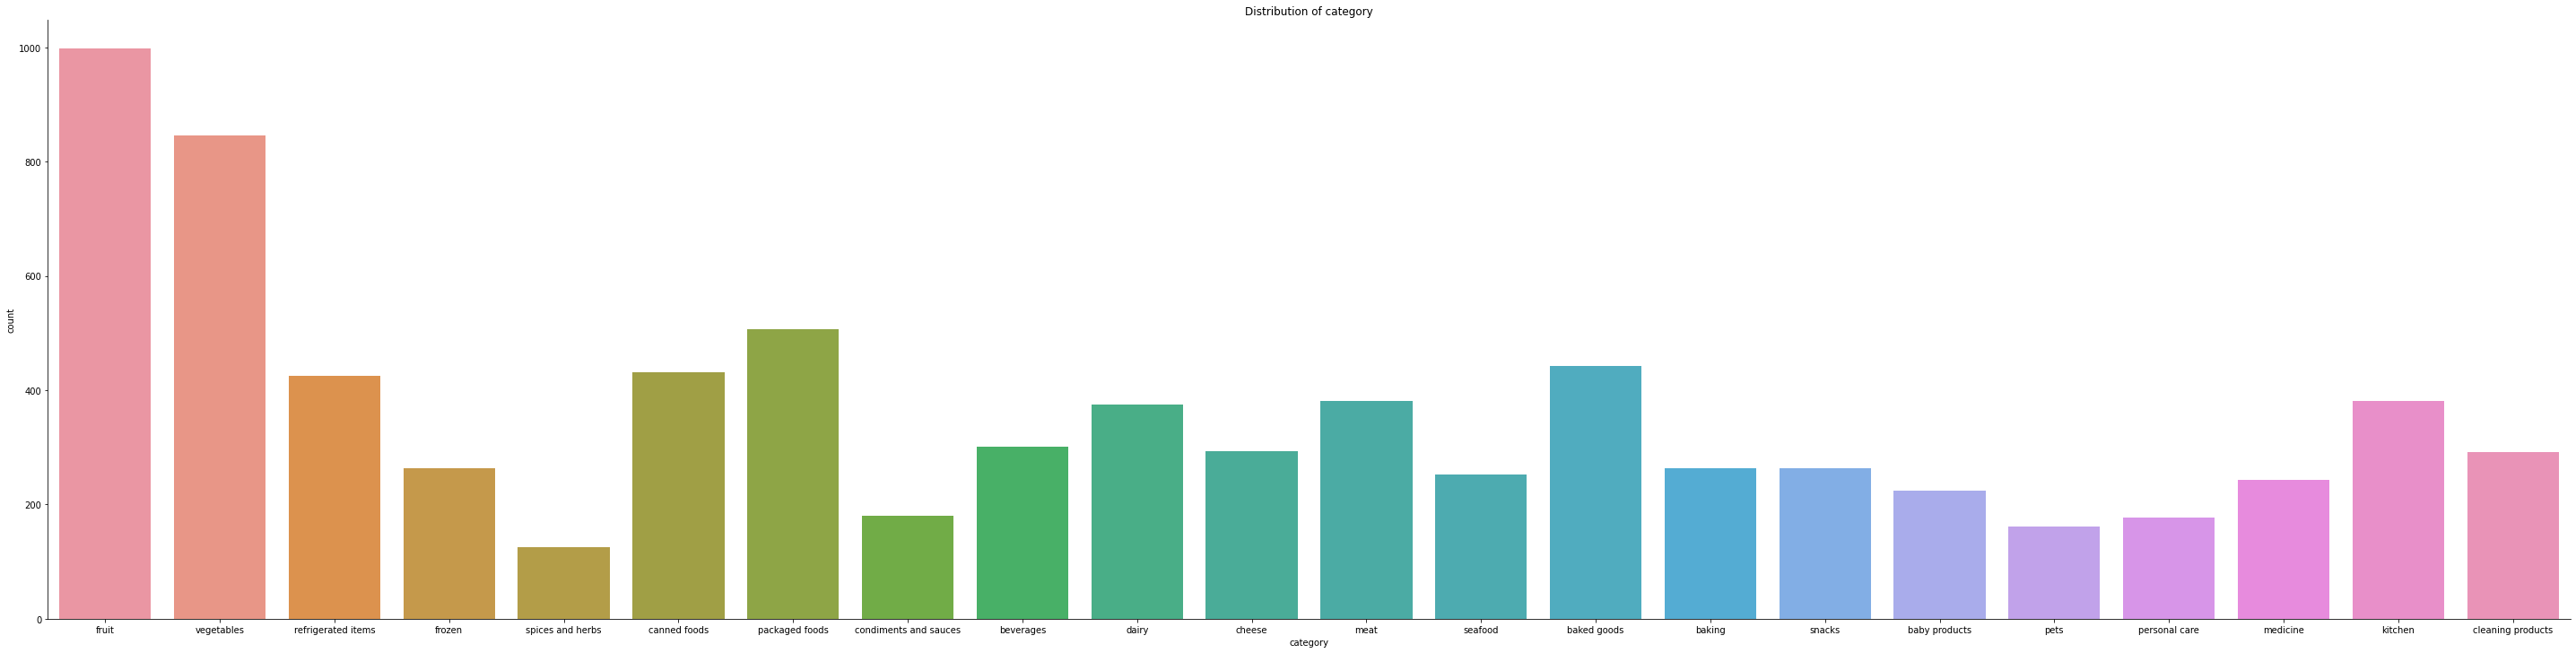

In [18]:
plot_categorical_distribution(df,'category')

In [19]:
get_unique_values(df,'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


There are 5 unique values for `customer_type`, and they seem to be evenly distributed. Let's visualise this:

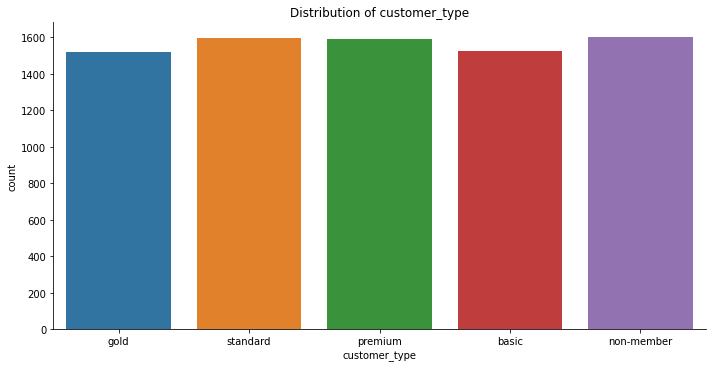

In [20]:
plot_categorical_distribution(df,'customer_type', height=5, aspect=2)

From this sample of data, non-members appear to be the most frequent type of customers, closely followed by standard and premium customers

In [21]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


There are 4 unique values for `payment_type`, and they seem to be quite evenly distributed once again. Let's visualise this:

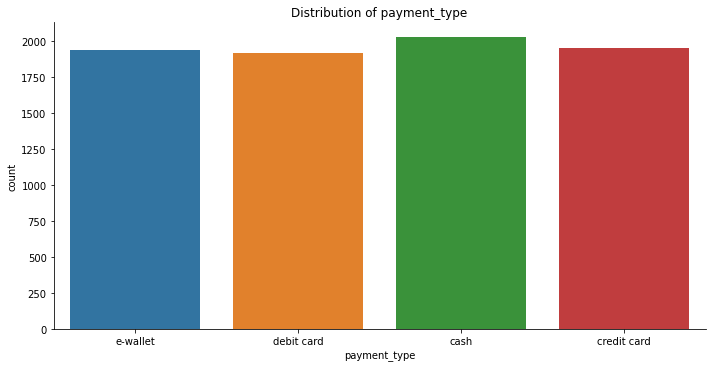

In [22]:
plot_categorical_distribution(df,'payment_type',height=5,aspect=2)

Interestingly, cash seems to be the most frequently used method of payment from this sample of data, with debit cards being the least frequent. 


This dataset is a sample from 1 store across 1 week. So it will be interesting to see if the population sample follows similar patterns.

In [23]:
get_unique_values(df,'timestamp')

Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64


Clearly there are a lot of unique values for the timestamp column. 

However, you may have noticed something...

The column named `timestamp` appears to be categorical, but in actual fact it's not. This is a datetime, following the format of `2022-03-01 10:00:45 = YYYY-MM-DD HH:MM:SS`. Therefore, we must transform this column to reflect its true form.

A helper function is provided below to convert the column into a datetime column.

In [24]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [25]:
df = convert_to_datetime(df,'timestamp')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


Using the `.info()` method again, we can see that the timestamp is now of type `datetime64[ns]`, which indicates it is a datetime based data type. Now this is a datetime column, we can explore this column into its consitituent parts, e.g. we can explore datetime into `hour` for example.

In [28]:
df['hour']=df['timestamp'].dt.hour

In [29]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [30]:
get_unique_values(df,'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


Here we can see that the 11th, 16th and 18th hour of the day are the top 3 hours of the day for transactions being processed. This is interesting, this would suggest that their busiest times of day may be just before lunch, and as people are on the way home from work. Once again, this is a small sample of data, so we can't make assumptions on the population sample of data, but it gives us insights to go back to the business with.

##Correlations


By now, we have a good understanding of all the columns within the dataset, as well as the values that occur within each column. One more thing that we can do is to look at how each of the numerical columns are related to each other.

To do this, we can use `correlations`. Correlations measure how each numeric column is linearly related to each other. It is measured between -1 and 1. If a correlation between 2 columns is close to -1, it shows that there is a negative correlation, i.e, as 1 increases, the other decreases. If a correlation between 2 columns is close to 1, it shows that they are positively correlated, i.e, as 1 increases, so does the other. Therefore, correlations do not infer that one column causes the other, but it gives us an indication as how the columns are linearly related.

In [33]:
corr=df.corr()
print(corr)
corr.style.background_gradient(cmap='coolwarm')

            unit_price  quantity     total      hour
unit_price    1.000000  0.024588  0.792018  0.010842
quantity      0.024588  1.000000  0.521926 -0.008410
total         0.792018  0.521926  1.000000  0.010354
hour          0.010842 -0.008410  0.010354  1.000000


,unit_price,quantity,total,hour
unit_price,1.000000,0.024588,0.792018,0.010842
quantity,0.024588,1.000000,0.521926,-0.008410
total,0.792018,0.521926,1.000000,0.010354
hour,0.010842,-0.008410,0.010354,1.000000


From this correlation matrix, we can see that the only columns that have a high correlation are `unit_price` and `total`. This is understandable because total is calculated using unit_price. All the other correlations are close to 0, indicating that there is not a significant positive or negative correlation between the numeric variables.

##Summary

We have completed an initial exploratory data analysis on the sample data provided. We should now have a solid understanding of the data. 
The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for